# Linear Regression
# project manas task phase 2022

In [78]:
import pandas as pd
import numpy as np
import statistics as stat


In [79]:
df=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\train.csv")
df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [80]:
x_t = []     #x transpose
for i in range(7):
        x_t.append(df.iloc[:, i])
x_trans = np.array(x_t, dtype=float)



In [81]:
#z_score_normalization of the transpose

m=len(x_trans)
n=len(x_trans[0])
for i in range(m):
    mean=stat.mean(x_trans[i])
    std=stat.stdev(x_trans[i])
    for j in range(n):
        nr=(x_trans[i][j]-mean)
        dr=std
        x_trans[i][j]=nr/dr
x=x_trans.T




In [185]:
class linear_regression():
    def __init__(self):
        self.columns=7
        self.rows=1167
        self.alpha=0.01
        self.w=np.zeros(7)
        self.b=0
        self.iterations=10000
        
    def f(self, i):
        return np.dot(self.w, x[i]) + self.b
        
    def deviation(self, i):
        return self.f(i)-df['SalePrice'][i]
        
    def J(self):
        sigma=0
        for i in range(len(x)):
            sigma+=(self.deviation(i))**2
        return sigma/(2*self.rows)
        """sigma_l=[]
        for i in range(len(x1[0])): # for each row
            sigma=0
            for j in range(len(x1)):              # for each row element in that column
                sigma += (self.f(j)-df['SalePrice'][j])*x_trans[i][j]
            
            #sigma_b += (self.f(i)-df['SalePrice'][i])
            #self.w[i] -= (self.alpha/self.m) * sigma
            sigma_l.append(sigma)

        
        #db = (1/self.n_samples) * np.sum( self.f_wb(self.X_tr) - self.y_tr )

        sigma_b=0
        for k in range(len(x1)):
            sigma_b+=   ((self.f(k)) - df['SalePrice'][k]) 

        #Simultaneous Updates
        for i in range(7):
            self.w[i] -= (self.alpha/self.m) * sigma_l[i]

        self.b -= (self.alpha/self.m) * sigma_b"""

    def iterate(self):
        diff=[]
        for i in range(len(x)):
            diff.append(self.deviation(i))
        
        difference=np.array(diff, dtype=float)
        self.w-= (self.alpha/self.rows)*np.dot(x_trans, difference.T)
        self.b-= (self.alpha/self.rows)*np.sum(diff)
        self.J()
        

     
    

In [186]:
j=[]
obj = linear_regression()
for i in range(obj.iterations):
    obj.iterate()
    j.append(obj.J())
print(obj.w, '\t', obj.b)

[32488.99034235 21835.02802683 11104.43106526  3959.8711547
  9037.55227274  5238.26756391  1135.62339853] 	 181223.5916095876


In [187]:
for i in range(1167):
    print(np.dot(x[i],obj.w)+obj.b)

198814.5792399734
186467.61736378624
142744.43466597935
391718.9066864103
199087.8384396742
149744.14466380212
180411.28118415078
124376.1506116433
123444.64370770275
48141.4313595671
272842.682223863
105925.08025395003
117667.20248388888
257657.31792139943
132423.53364893934
122801.94687699256
190838.074192249
184366.02042735583
103739.3186948249
183614.18248299515
121693.4457306263
167823.96438806262
150359.36254233425
136557.60825741908
118786.50187203809
85772.57262852017
145758.5419615761
178503.97482101957
284288.31789138133
155095.9908685849
172844.18920091848
184098.87091963342
124376.64083243613
140765.9174872641
212623.12841738778
218977.73473635348
416011.4262366203
269915.1793980413
134834.54759437375
146758.8927651329
187263.87670985132
353495.2034456393
186045.57786648697
157955.66464835976
102732.38162374975
271922.844690925
106978.63207798172
109752.0045153983
175906.30919624222
259431.21768612377
181494.8493182553
233050.22281243885
215877.99432472535
124586.6721339983

In [188]:

from matplotlib import pyplot as plt

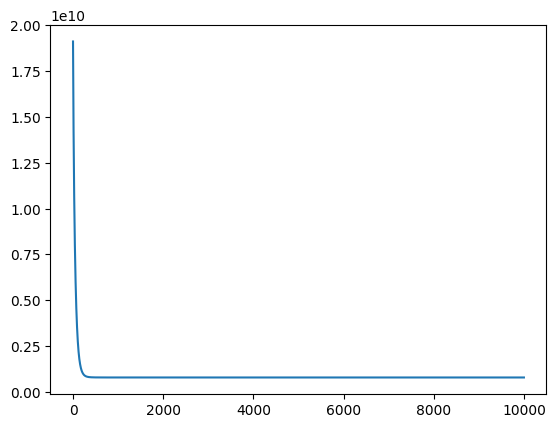

In [189]:
dev_x=[]
for i in range(obj.iterations):
    dev_x.append(i)
dev_y=j
plt.plot(dev_x, dev_y)

In [190]:
df1=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\test.csv")
df1

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000
...,...,...,...,...,...,...,...,...,...,...,...
287,6,1158,2,576,1158,1158,1,5,2004,2004,158000
288,6,987,1,264,483,483,1,5,1972,2007,118000
289,6,848,2,420,848,848,1,4,2003,2003,140000
290,7,1266,2,388,1266,1266,2,6,2007,2007,159895


In [191]:
#data for test case
x_t1 = []    
for i in range(7):
        x_t1.append(df1.iloc[:, i])
x_trans1 = np.array(x_t1, dtype=float)

In [192]:
#z_score_normalization of the transpose

m=len(x_trans1)
n=len(x_trans1[0])
for i in range(m):
    mean=stat.mean(x_trans1[i])
    std=stat.stdev(x_trans1[i])
    for j in range(n):
        nr=(x_trans1[i][j]-mean)
        dr=std
        x_trans1[i][j]=nr/dr
x1=x_trans1.T


predicted=[]
for i in range(len(x1)):
    predicted.append(np.dot(obj.w, x1[i])+obj.b)
predicted=np.array(predicted, dtype=float)



In [193]:
actual=df1["SalePrice"]
actual=np.array(actual, dtype=float)

In [196]:
r2 = 1 - (np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - actual.mean())))

In [195]:
accuracy=print(r2*100)

80.49148491730418


In [2]:
a = ' '
len(set(a))

1